In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing time series specific libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import levene
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace import sarimax
import prophet
from prophet import Prophet# Importing Basic libraries 


# Miscellaneous libararies
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from random import random

# Libaraies for evaluation of model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.arima.model import ARIMAResults


Import data

In [22]:
import pandas as pd

ruta_archivo = "C:/Users/milla/Documents/Maestria (Tesis)/Capitulo 2/Modelo Arima de la Demanda/Investigation_Code/international-airline-passengers.csv"

df = pd.read_csv(ruta_archivo, names=['year', 'passengers'], header=0)


In [23]:
# Removing last row as it is not valid
df = df.iloc[:(len(df) - 1),]
df

,year,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


Describe data

In [24]:
df.describe(include = 'all')

,year,passengers
count,144,144.000000
unique,144,NaN
top,1949-01,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


Verification about the first and last line 

In [25]:
print(f'Time period start : {df.year.min()}\nTime period end : {df.year.max()}')

Time period start : 1949-01
Time period end : 1960-12


review about columns and rows

In [26]:
df.columns,df.shape

(Index(['year', 'passengers'], dtype='object'), (144, 2))

Preprocessing data and Visualization

In [27]:
# Converting year column to datetime format
df['year'] = pd.to_datetime(df['year'], format = '%Y-%m')
df

,year,passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [28]:
# Setting year as index for easier manipulations
y = df.set_index('year')
y,y.index,y

(            passengers
 year                  
 1949-01-01       112.0
 1949-02-01       118.0
 1949-03-01       132.0
 1949-04-01       129.0
 1949-05-01       121.0
 ...                ...
 1960-08-01       606.0
 1960-09-01       508.0
 1960-10-01       461.0
 1960-11-01       390.0
 1960-12-01       432.0
 
 [144 rows x 1 columns],
 DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
                '1949-09-01', '1949-10-01',
                ...
                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
                '1960-11-01', '1960-12-01'],
               dtype='datetime64[ns]', name='year', length=144, freq=None),
             passengers
 year                  
 1949-01-01       112.0
 1949-02-01       118.0
 1949-03-01       132.0
 1949-04-01       129.0
 1949-05-01       121.0
 ...                

 check the Null values

In [29]:
# Null values check
y.isnull().sum()

passengers    0
dtype: int64

TIme series plot

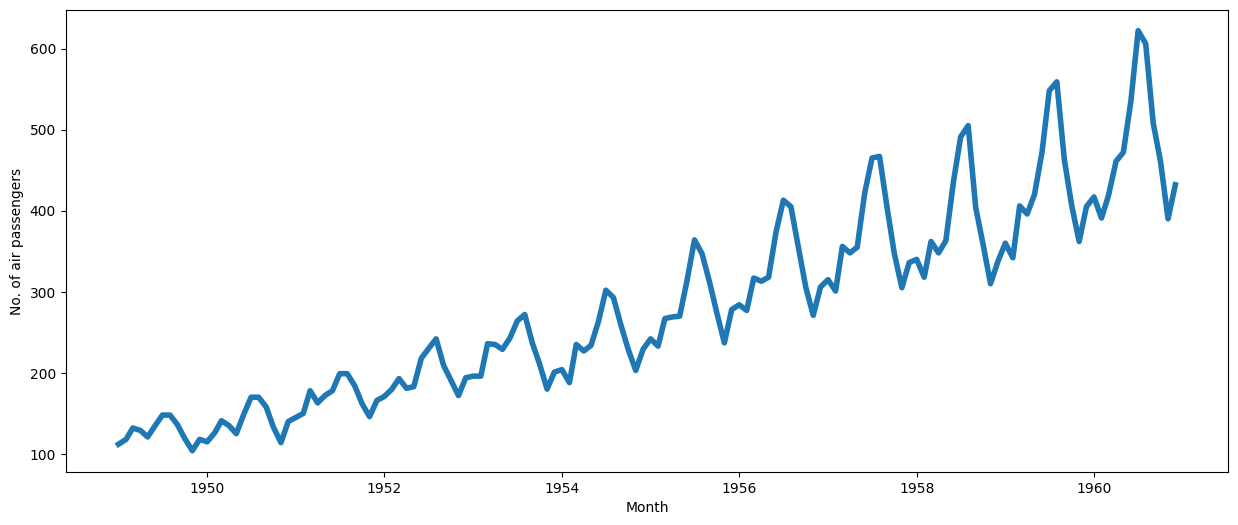

In [30]:
# Time Series plot
plt.figure(figsize = (15,6))
plt.plot(y,linewidth = 4)
plt.xlabel('Month')
plt.ylabel('No. of air passengers')
plt.show()

Show histogram a density graphic about this one 

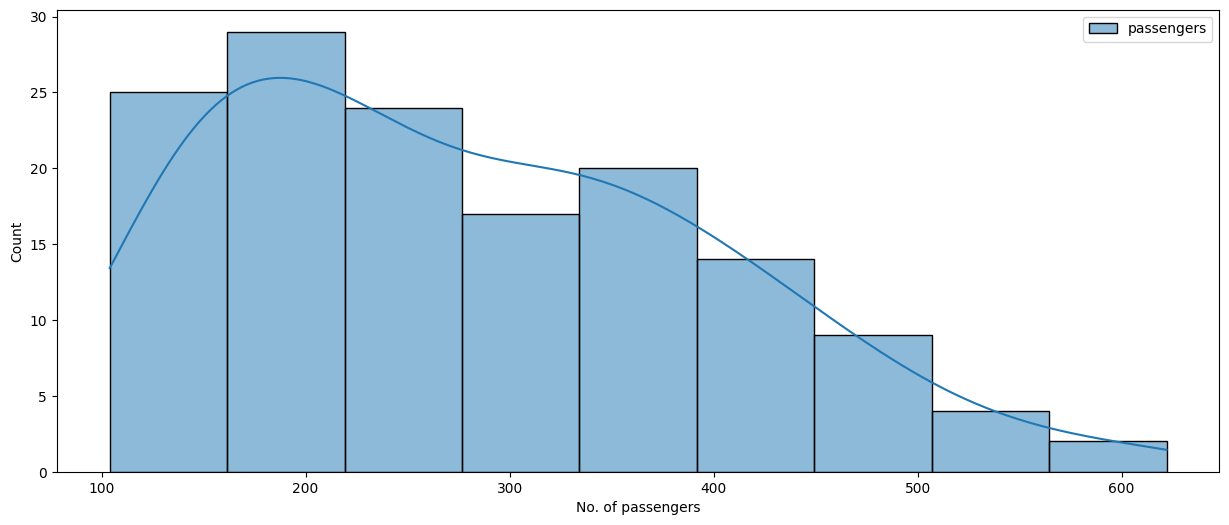

In [31]:
# Density Plot
plt.figure(figsize = (15,6))
sns.histplot(y, kde = True)
plt.xlabel('No. of passengers')
plt.ylabel('Count')
plt.show()

Graphic for show tends 

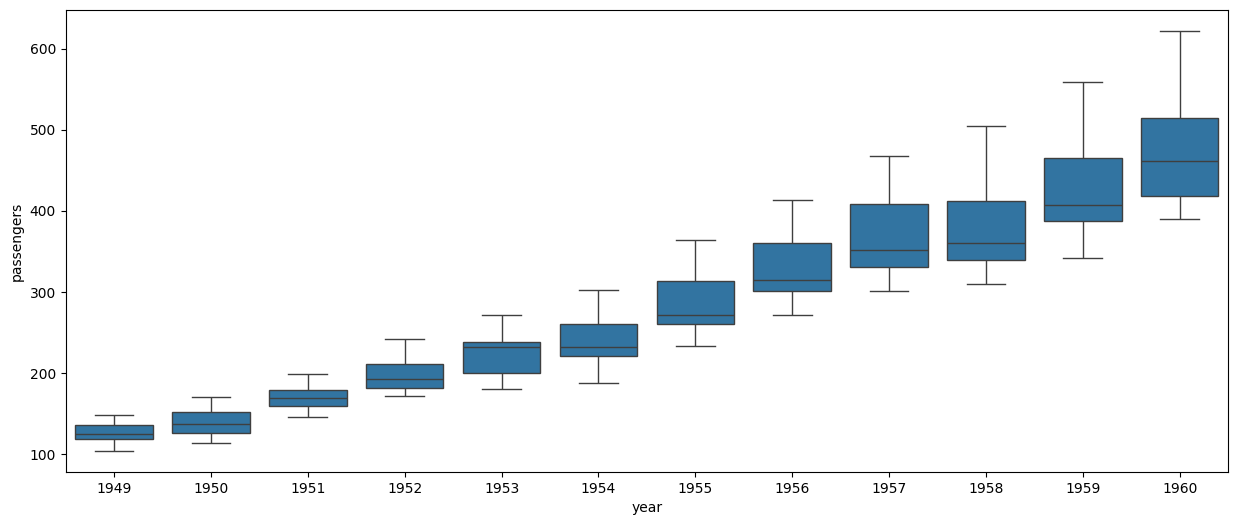

In [32]:
# Box-plot
plt.figure(figsize = (15,6))
sns.boxplot(x = y.index.year, y = y.passengers)
plt.show()

### Decomposition of Time Series

<Figure size 1800x800 with 0 Axes>

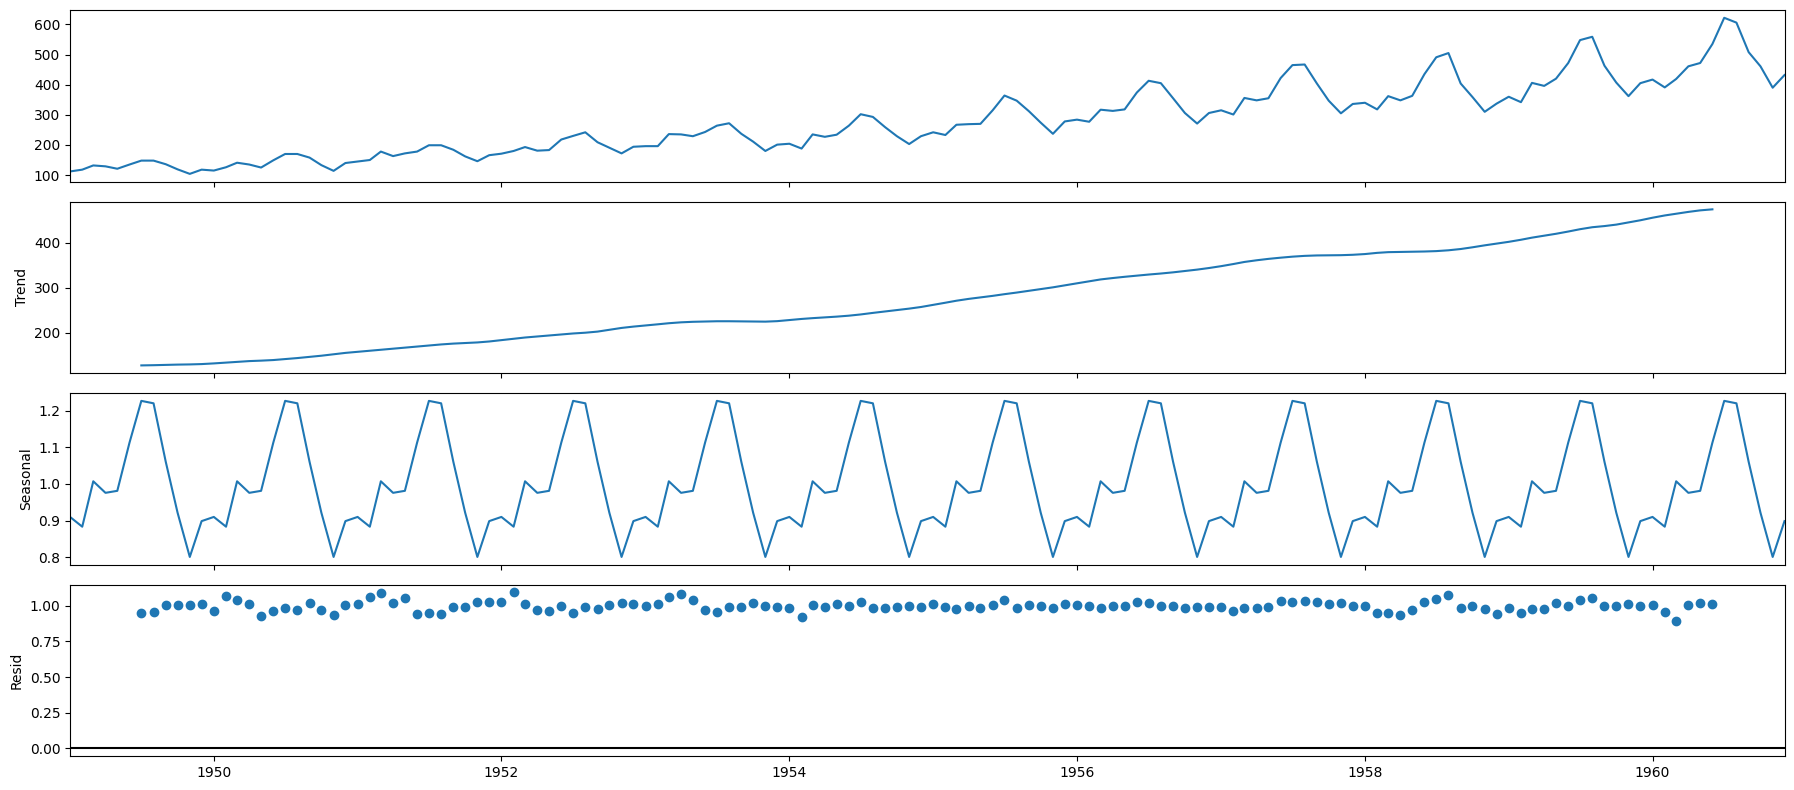

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model = 'multiplicative')
plt.figure(figsize = (18,8))
decomposition.plot()
plt.show()

Graphic ACF and PACF

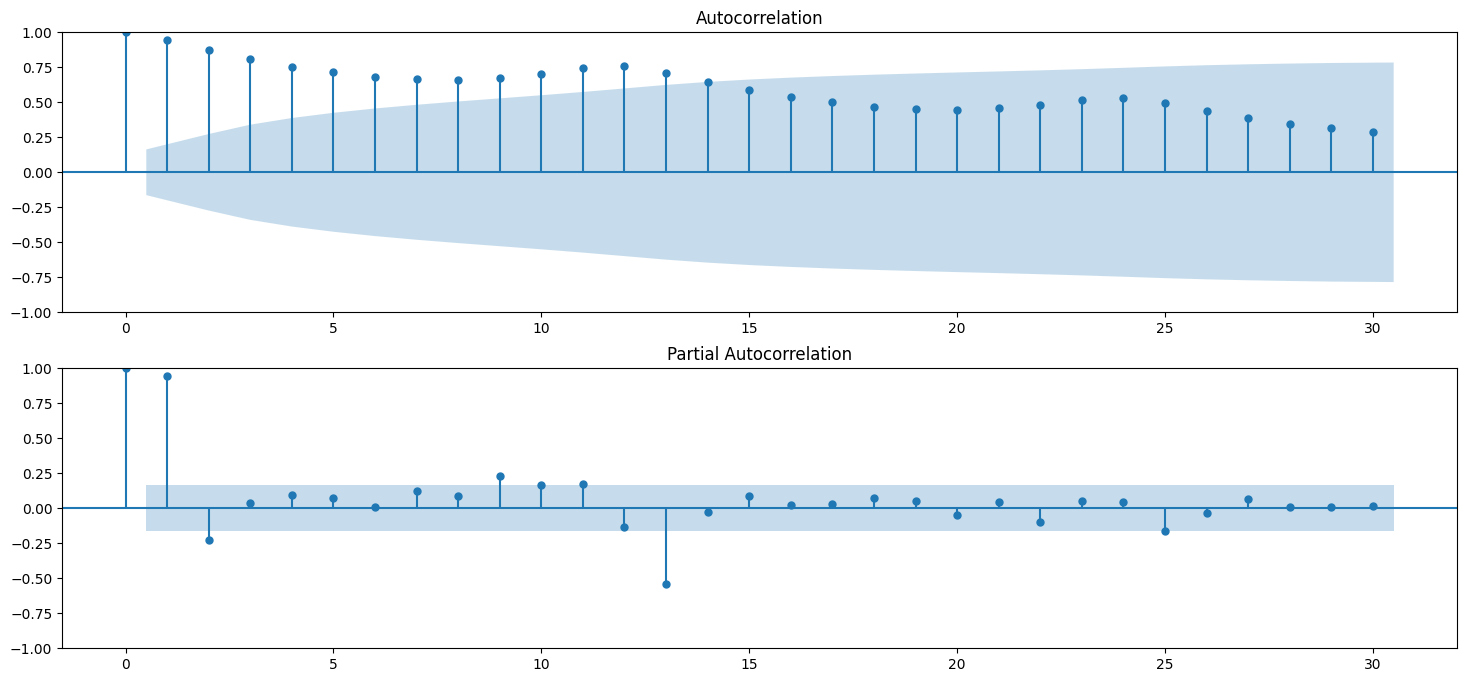

In [34]:
# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(y['passengers'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(y['passengers'], ax=plt.gca(), lags = 30)
plt.show()

Rolling Mean & Rolling Standard Deviation

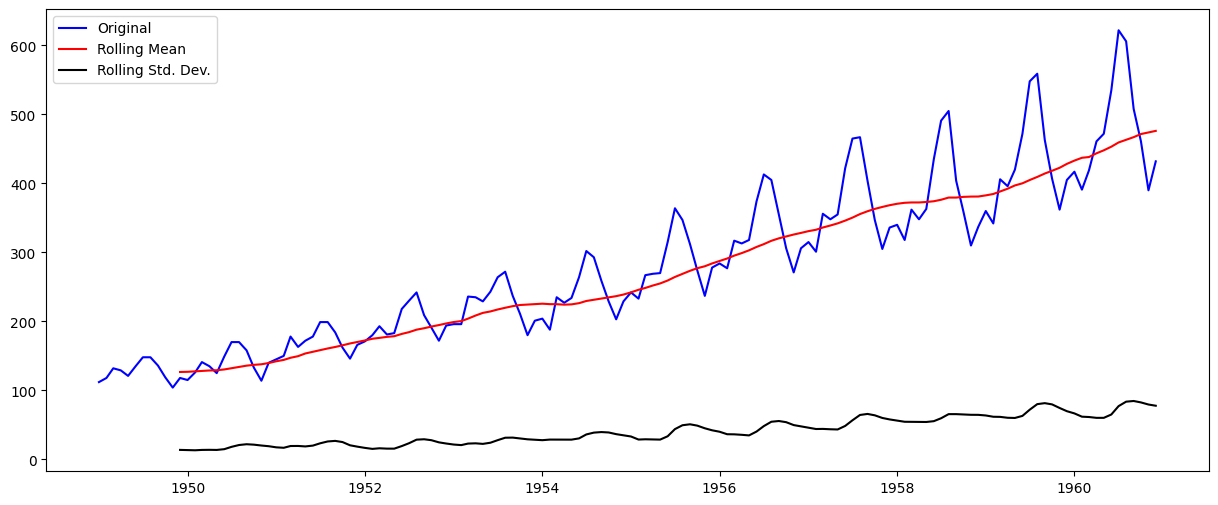

In [35]:
# Rolling Mean & Rolling Standard Deviation
rolmean = y.rolling(window = 12).mean() # Calcula con periodo windows la media movil 
rolstd = y.rolling(window = 12).std() # caclula la desviacino estandar movil segun la  windows 

plt.figure(figsize = (15,6))
orig = plt.plot(y, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

Now create a function  for stationary  analysis 

In [36]:
# Creating general function to test stationarity of a time series

def test_stationarity(timeseries,p):
    B = timeseries.iloc[:, 0]
    B = B.reset_index(drop=True)
    # Rolling Mean & Rolling Standard Deviation
    rolmean = timeseries.rolling(window = p).mean()
    rolstd = timeseries.rolling(window = p).std()

    plt.figure(figsize = (15,6))
    orig = plt.plot(timeseries, color = 'blue', label ='Original')
    mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
    plt.legend(loc = 'best')
    plt.show()

    # Augmented Dicky-Fuller Test
    print('-------------Results of Dicky Fuller Test -------------')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                     'No. of Lags used', 'No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    dfoutput['Maximized AIC:'] = dftest[5]
    print(dfoutput)
    if dftest[1]>0.05 :
            print("the null hypothesis is fulfilled for no stationary series ")
    else:
        print("the  hypothesis is fulfilled for  stationary series ")

    #! Agree the Levene test
    # Divide the data into three equal parts
    
    if len(B)//2==0 :
        part_size = len(B) // 2
        seg1 = B[:part_size]
        seg2 = B[2*part_size:]
            # # Apply the levene test to each pair of segments
        resultado_levene_seg1_seg2 = levene(seg1, seg2)
    # Apply the levene test to each pair of segments
         # # Print the results
        print("Valor p de la prueba de levene para seg1 y seg2:", resultado_levene_seg1_seg2.pvalue)
        if resultado_levene_seg1_seg2.pvalue < 0.05:
            print('La serie no es estacionaria en VARIANZA')
        else:
            print('La serie es estacionaria en VARIANZA')
    else:
    # Adjust the parts size if needed to make them approximately equal
        part_size = len(B) // 3
        # Divide the series into three parts
        seg1 = B[:part_size]
        seg2 = B[part_size:2*part_size]
        seg3 = B[2*part_size:]
        print(seg3)
        # Apply the levene test to each pair of segments
        resultado_levene_seg1_seg2 = levene(seg1, seg2)
        resultado_levene_seg2_seg3 = levene(seg2, seg3)
        resultado_levene_seg3_seg1 = levene(seg3, seg1)

        # Print the results
        print("Valor p de la prueba de levene para seg1 y seg2:", resultado_levene_seg1_seg2.pvalue)
        print("Valor p de la prueba de levene para seg2 y seg3:", resultado_levene_seg2_seg3.pvalue)
        print("Valor p de la prueba de levene para seg3 y seg1:", resultado_levene_seg3_seg1.pvalue)

        if resultado_levene_seg1_seg2.pvalue < 0.05 and resultado_levene_seg2_seg3.pvalue < 0.05 and resultado_levene_seg3_seg1.pvalue < 0.05:
            print('La serie no es estacionaria en VARIANZA')
        else:
            print('La serie es estacionaria en VARIANZA')

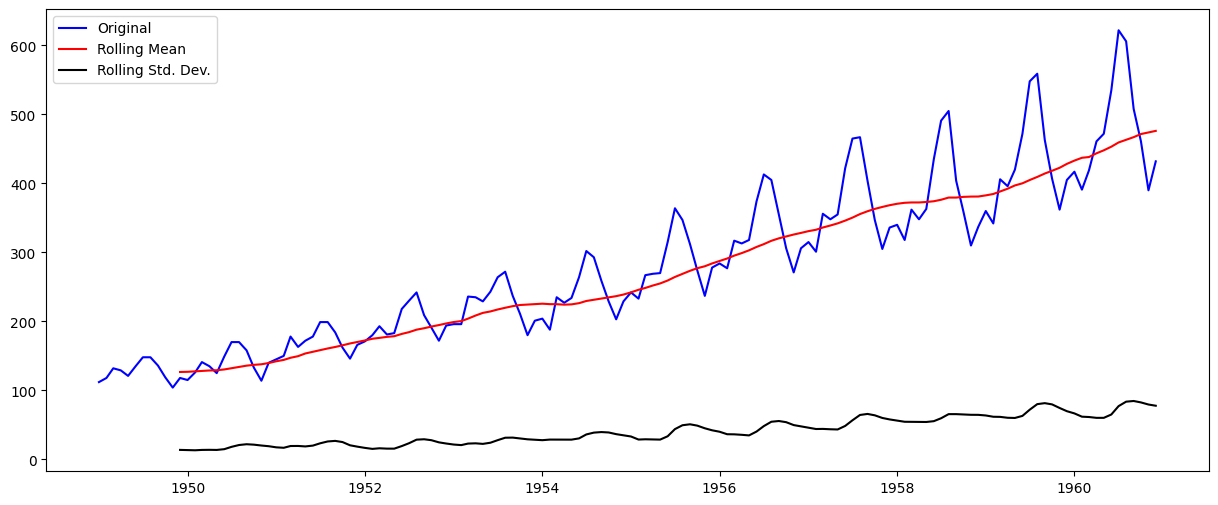

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                           0.815369
p-value : MacKinnon's approximate p-value      0.991880
No. of Lags used                              13.000000
No. of observations used                     130.000000
Critical Value (1%)                           -3.481682
Critical Value (5%)                           -2.884042
Critical Value (10%)                          -2.578770
Maximized AIC:                               996.692931
dtype: float64
the null hypothesis is fulfilled for no stationary series 
96     315.0
97     301.0
98     356.0
99     348.0
100    355.0
101    422.0
102    465.0
103    467.0
104    404.0
105    347.0
106    305.0
107    336.0
108    340.0
109    318.0
110    362.0
111    348.0
112    363.0
113    435.0
114    491.0
115    505.0
116    404.0
117    359.0
118    310.0
119    337.0
120    360.0
121    342.0
122    406.0
123    396.0
124    420.0
125    472.0
126    548.0
127    559.0
128   

In [37]:
# Stationarity test of log transformed TS
test_stationarity(y,12)

### Making Time Series Stationary

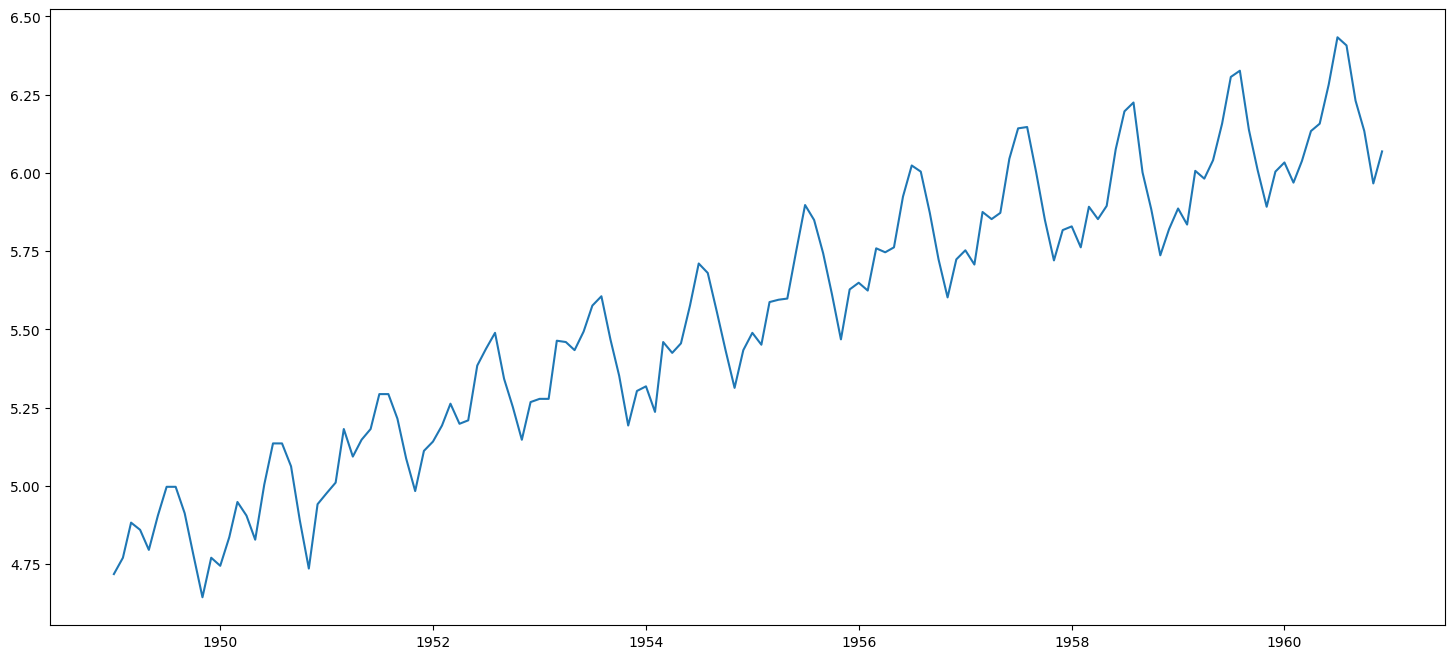

In [38]:
ts_log = np.log(y)
plt.plot(ts_log)

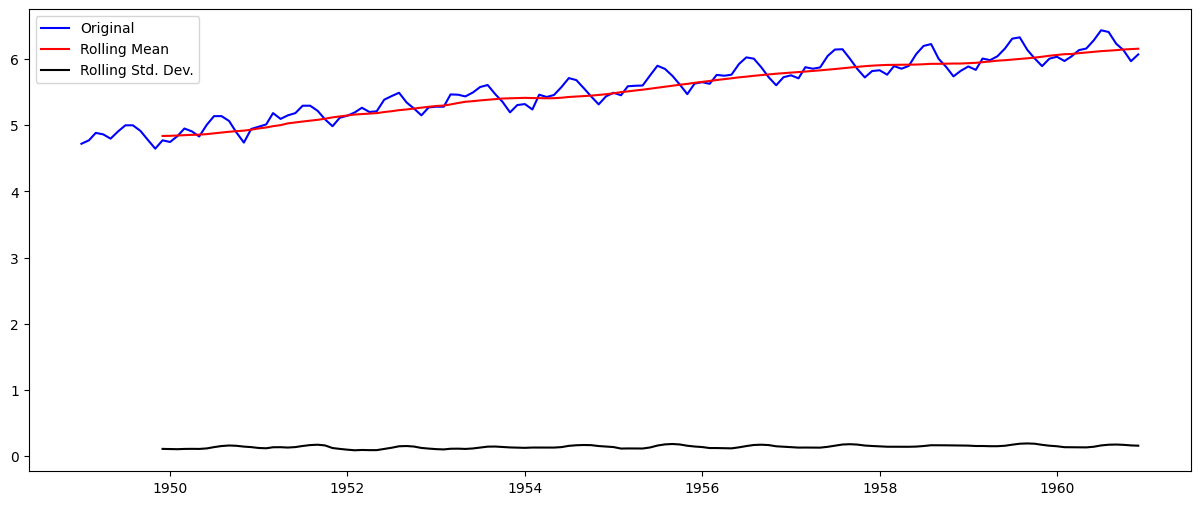

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -1.717017
p-value : MacKinnon's approximate p-value      0.422367
No. of Lags used                              13.000000
No. of observations used                     130.000000
Critical Value (1%)                           -3.481682
Critical Value (5%)                           -2.884042
Critical Value (10%)                          -2.578770
Maximized AIC:                              -445.399031
dtype: float64
the null hypothesis is fulfilled for no stationary series 
96     5.752573
97     5.707110
98     5.874931
99     5.852202
100    5.872118
101    6.045005
102    6.142037
103    6.146329
104    6.001415
105    5.849325
106    5.720312
107    5.817111
108    5.828946
109    5.762051
110    5.891644
111    5.852202
112    5.894403
113    6.075346
114    6.196444
115    6.224558
116    6.001415
117    5.883322
118    5.736572
119    5.820083
120    5.886104
121    5.834811
122   

In [39]:
# Stationarity test of log transformed TS
test_stationarity(ts_log,12)

Trace mean movil in Graphic for show the environment 

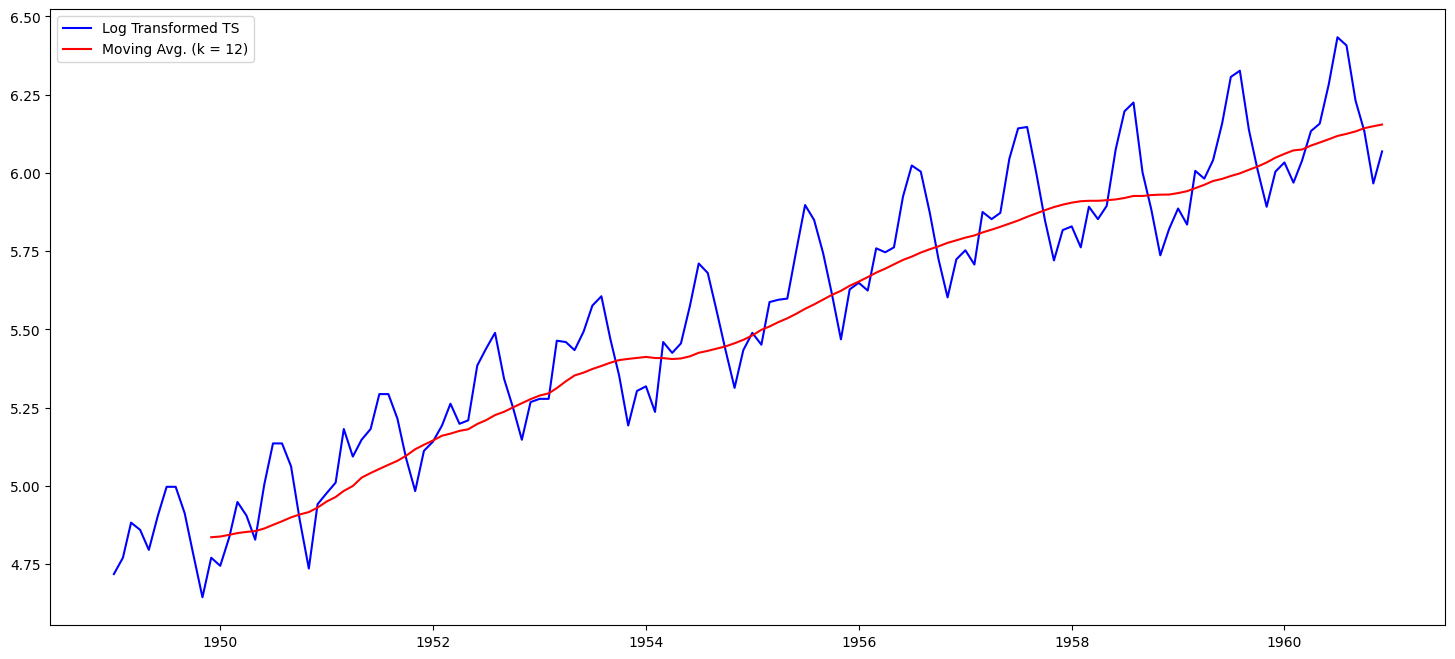

In [40]:
# Smoothing method : We will subtract Moving Avg. value from log transformed TS and then check its stationarity
mov_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log, color = 'blue', label ='Log Transformed TS')
plt.plot(mov_avg, color = 'red', label = 'Moving Avg. (k = 12)')
plt.legend(loc = 'best')
plt.show()

Apply the first diff

In [41]:
# Differencing : on log transformed TS we will use differncing technique
ts_log_diff = ts_log - ts_log.shift(periods = 1) # first differencing
ts_log_diff

,passengers
year,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [42]:
# dropping NA values from differenced TS
ts_log_diff = ts_log_diff.dropna()
ts_log_diff

,passengers
year,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


PLot  results

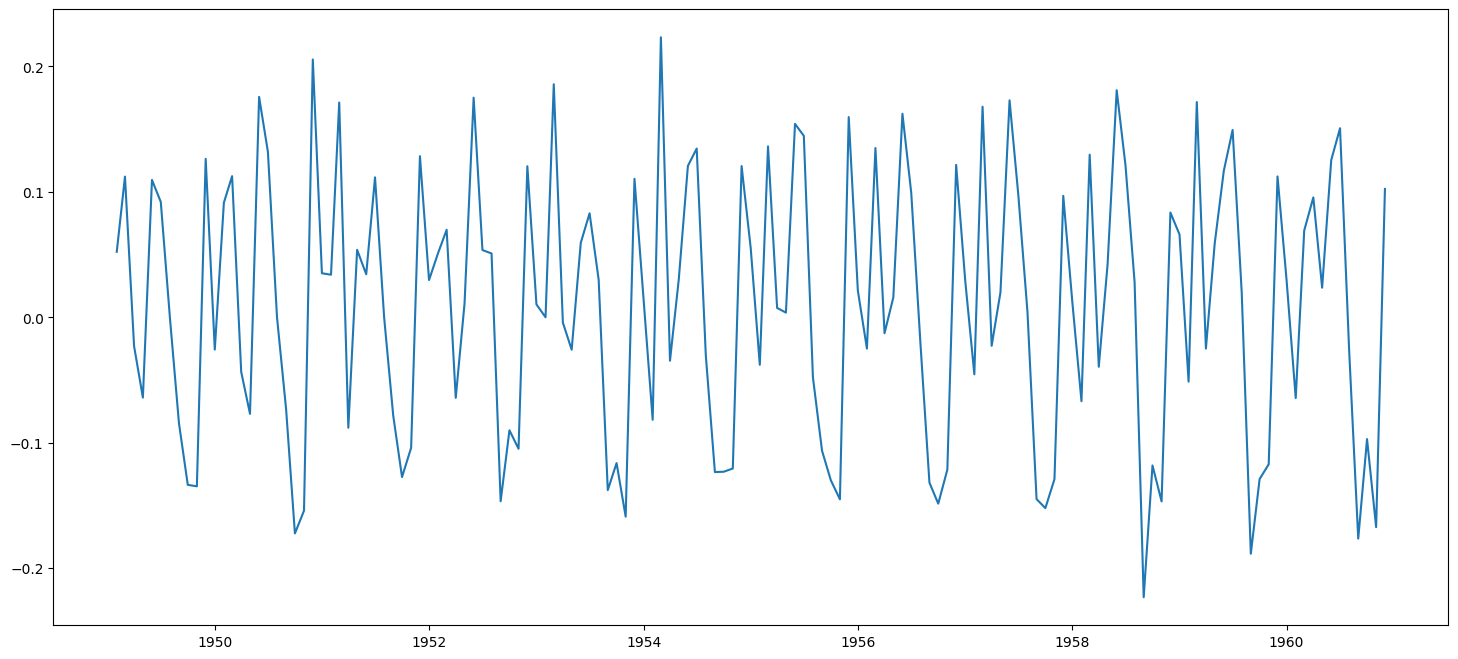

In [43]:
plt.plot(ts_log_diff)
plt.show()

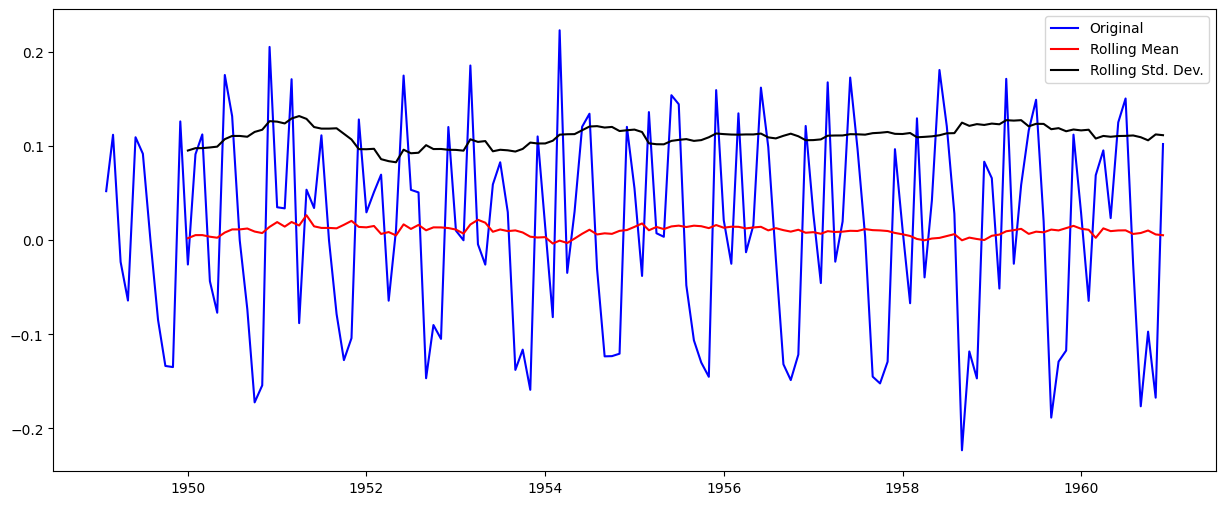

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -2.717131
p-value : MacKinnon's approximate p-value      0.071121
No. of Lags used                              14.000000
No. of observations used                     128.000000
Critical Value (1%)                           -3.482501
Critical Value (5%)                           -2.884398
Critical Value (10%)                          -2.578960
Maximized AIC:                              -440.358470
dtype: float64
the null hypothesis is fulfilled for no stationary series 
94     0.121466
95     0.028988
96    -0.045462
97     0.167820
98    -0.022728
99     0.019915
100    0.172888
101    0.097032
102    0.004292
103   -0.144914
104   -0.152090
105   -0.129013
106    0.096799
107    0.011834
108   -0.066894
109    0.129593
110   -0.039442
111    0.042200
112    0.180943
113    0.121098
114    0.028114
115   -0.223144
116   -0.118092
117   -0.146750
118    0.083511
119    0.066021
120   

In [44]:
# Checking stationarity on log transformed, first differencing TS
test_stationarity(ts_log_diff,12)

Can see that is no stationary, for this is necessary one more differentiation the second ordn 

In [45]:
# Differencing of order 2 on log transformed TS
ts_log_diff2 = ts_log - ts_log.shift(periods = 2)
ts_log_diff2

,passengers
year,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011
...,...
1960-08-01,0.124613
1960-09-01,-0.202459
1960-10-01,-0.273482


In [46]:
# Dropping NA values
ts_log_diff2 = ts_log_diff2.dropna()
ts_log_diff2

,passengers
year,
1949-03-01,0.164303
1949-04-01,0.089128
1949-05-01,-0.087011
1949-06-01,0.045462
1949-07-01,0.201422
...,...
1960-08-01,0.124613
1960-09-01,-0.202459
1960-10-01,-0.273482


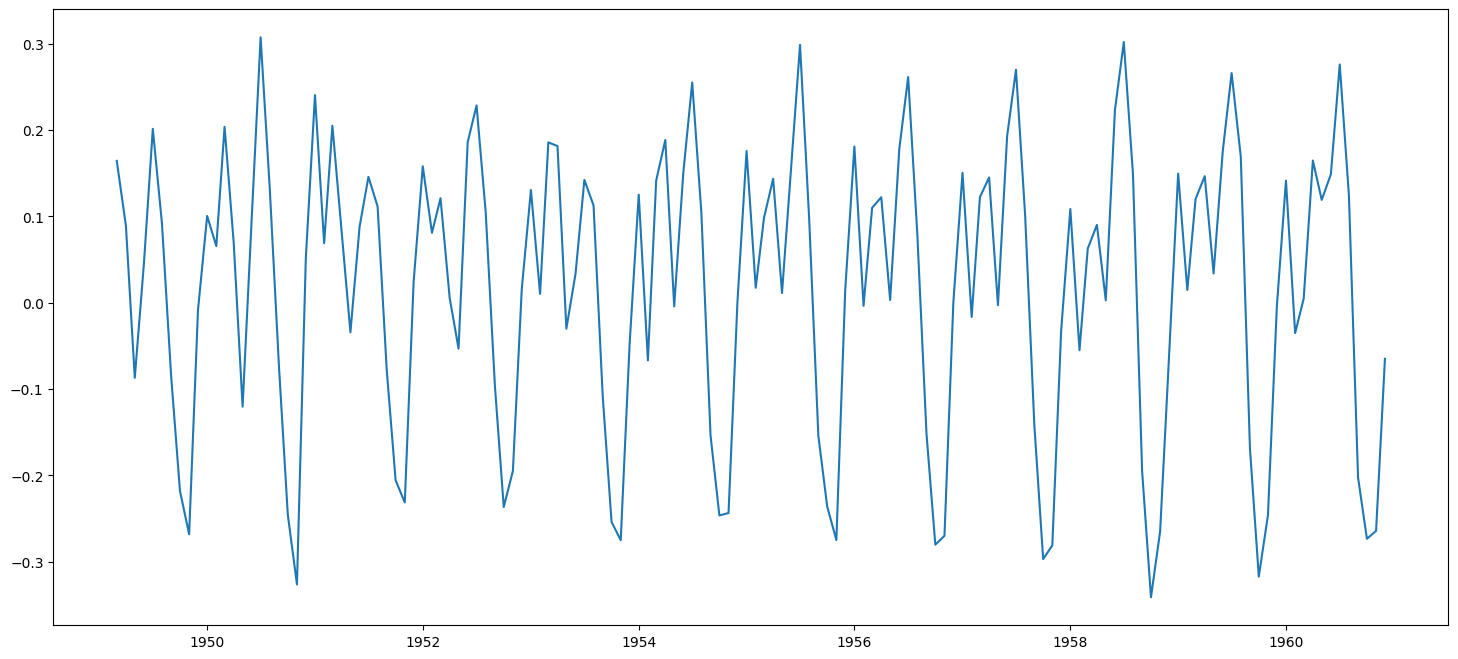

In [47]:
plt.plot(ts_log_diff2)
plt.show()

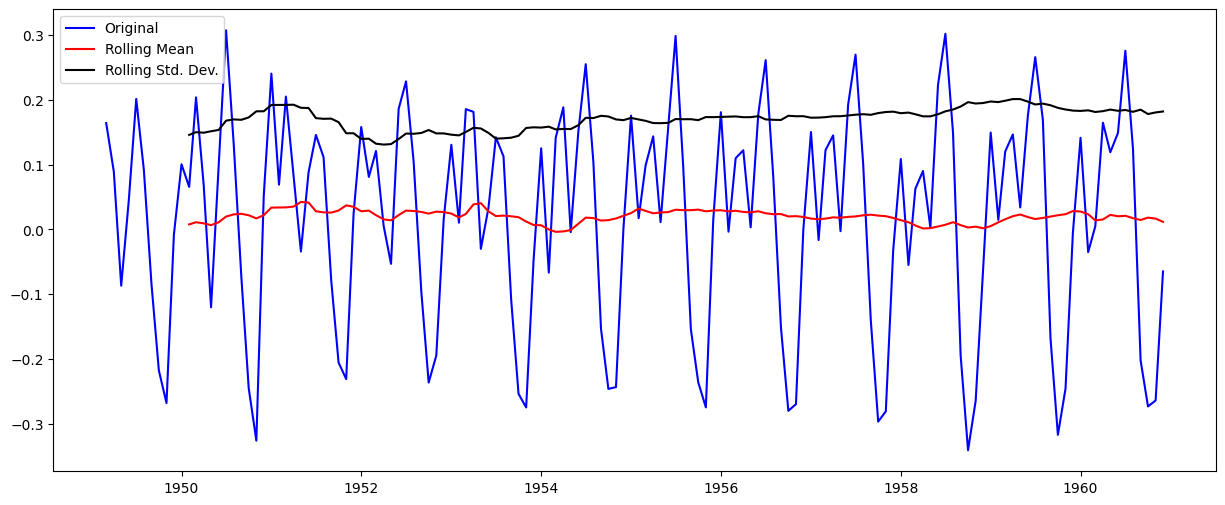

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -3.167907
p-value : MacKinnon's approximate p-value      0.021919
No. of Lags used                              11.000000
No. of observations used                     130.000000
Critical Value (1%)                           -3.481682
Critical Value (5%)                           -2.884042
Critical Value (10%)                          -2.578770
Maximized AIC:                              -431.937130
dtype: float64
the  hypothesis is fulfilled for  stationary series 
94     0.150454
95    -0.016475
96     0.122358
97     0.145092
98    -0.002813
99     0.192803
100    0.269920
101    0.101324
102   -0.140623
103   -0.297004
104   -0.281103
105   -0.032214
106    0.108634
107   -0.055060
108    0.062699
109    0.090151
110    0.002759
111    0.223144
112    0.302041
113    0.149212
114   -0.195029
115   -0.341236
116   -0.264843
117   -0.063239
118    0.149532
119    0.014728
120    0.120

In [48]:
# Checking stationarity of TS of diff. 2
test_stationarity(ts_log_diff2,12)

### Model Building - ARIMA/SARIMA

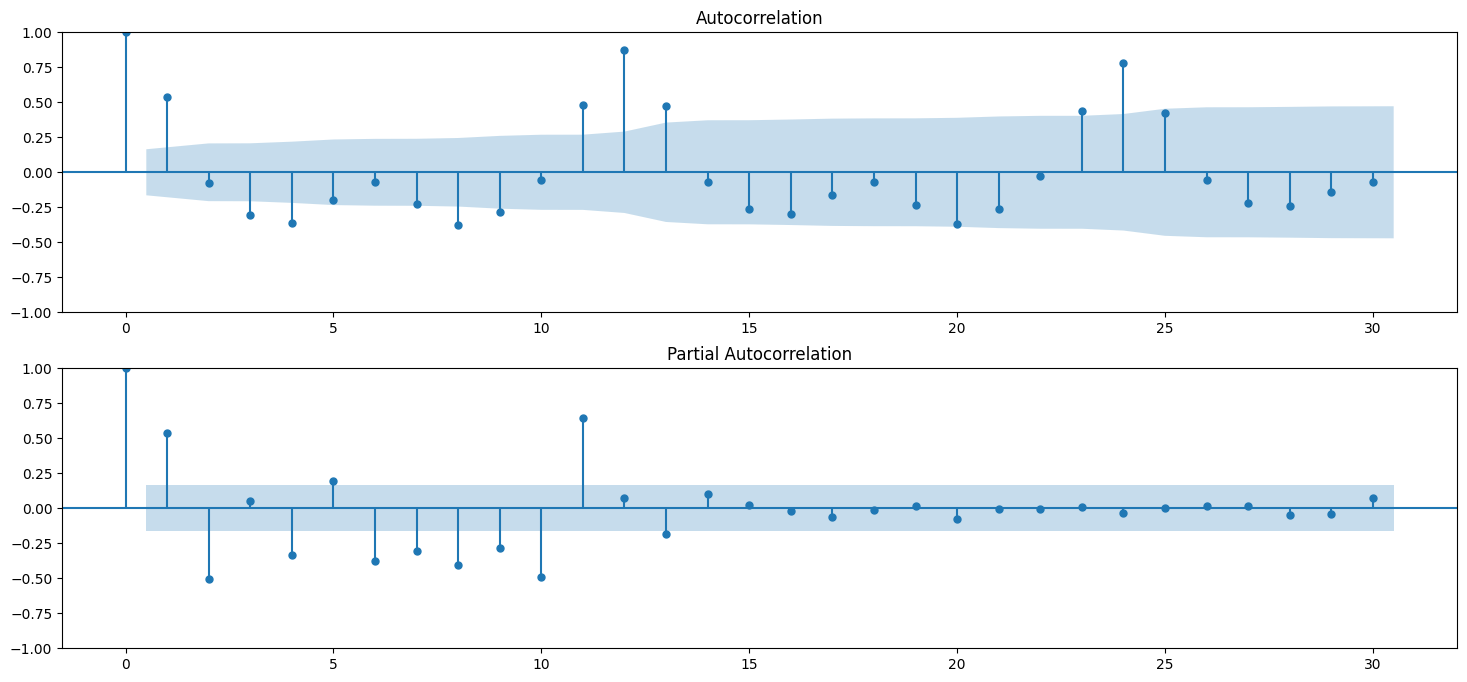

In [49]:
# Estimating p & q parameters from PACF & ACF plot resp.
plt.figure()
plt.subplot(211)
plot_acf(ts_log_diff2['passengers'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(ts_log_diff2['passengers'], ax=plt.gca(), lags = 30)
plt.show()

In [50]:
# Splitting TS data into train and test set for model training and testing
train_ts = ts_log.iloc[0:120,]
test_ts = ts_log.iloc[120: ,]
train_ts

,passengers
year,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1958-08-01,6.224558
1958-09-01,6.001415
1958-10-01,5.883322


### Select ARIMA Model

In [51]:
# Auto arima: seleccion basada en AIC
# ==============================================================================
modelo = auto_arima(
            y                 = train_ts,
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            seasonal          = True,
            test              = 'adf',
            m                 = 12, # periodicidad de la estacionalidad
            d                 = None, # El algoritmo determina 'd'
            D                 = None, # El algoritmo determina 'D'
            trace             = True,
            error_action      = 'ignore',
            suppress_warnings = True,
            stepwise          = True,
            random_state      =4,
            n_fits            =15000
)
print(modelo.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-377.994, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-353.412, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-383.358, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-389.010, Time=0.35 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-364.326, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-387.220, Time=0.39 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-387.254, Time=1.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-384.230, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-379.989, Time=0.32 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-387.279, Time=0.53 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-387.065, Time=0.38 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-388.643, Time=0.21 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-385.182, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]

In [52]:

model = ARIMA(train_ts, order = (0,1,1), seasonal_order=(0,1,1,12))
results = model.fit()

In [53]:
# Obtén las predicciones para el conjunto de prueba
predictions = modelo.predict(n_periods=120)
predictions_test_=modelo.predict(len(test_ts))
# Crea un DataFrame con las fechas y las predicciones
predictions_df = pd.DataFrame(predictions, index=test_ts.index, columns=['Predictions'])

# # Imprime el DataFrame con las predicciones
print(predictions_df)
predictions_df.describe()

            Predictions
year                   
1959-01-01     5.853881
1959-02-01     5.803864
1959-03-01     5.948470
1959-04-01     5.920542
1959-05-01     5.947913
1959-06-01     6.116195
1959-07-01     6.228905
1959-08-01     6.236826
1959-09-01     6.062399
1959-10-01     5.930776
1959-11-01     5.793490
1959-12-01     5.894256
1960-01-01     5.921029
1960-02-01     5.871011
1960-03-01     6.015618
1960-04-01     5.987689
1960-05-01     6.015061
1960-06-01     6.183343
1960-07-01     6.296053
1960-08-01     6.303974
1960-09-01     6.129547
1960-10-01     5.997924
1960-11-01     5.860638
1960-12-01     5.961404


,Predictions
count,24.000000
mean,6.011700
std,0.151453
min,5.793490
25%,5.913970
50%,5.974547
75%,6.119533
max,6.303974


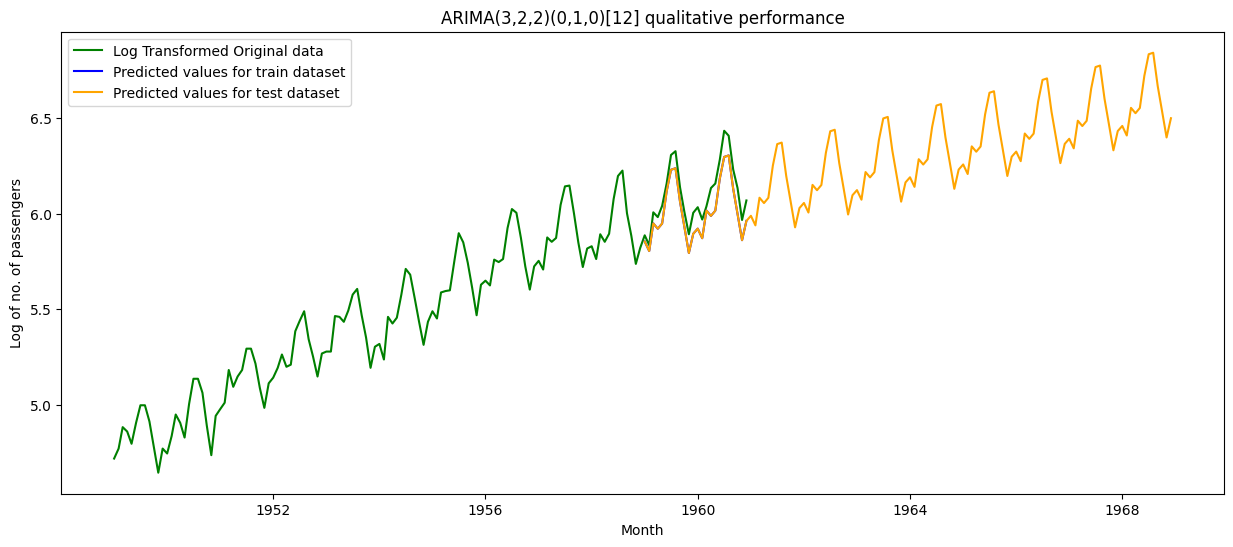

In [54]:
plt.figure(figsize = (15,6))
plt.plot(ts_log, color = 'green', label = 'Log Transformed Original data')
plt.plot(predictions_df, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(predictions, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Month')
plt.ylabel('Log of no. of passengers')
plt.title('ARIMA(3,2,2)(0,1,0)[12] qualitative performance')
plt.legend(loc = 'best')
plt.show()




In [55]:
# Evaluation metrics for model1
MSE_train_1 = mean_squared_error(train_ts, predictions)
print('Mean Squared Error (MSE) of model ARIMA(0,1,1)(0,1,1)[12] for trained data = ',MSE_train_1)
MAE_train_1 = mean_absolute_error(train_ts, predictions)
print('Mean Absolute Error (MAE) of model ARIMA(0,1,1)(0,1,1)[12] for trained data = ',MAE_train_1)
RMSE_train_1 = np.sqrt(MSE_train_1)

#preparate for this test 
print('Root Mean Squared Error (RMSE) of model ARIMA(0,1,1)(0,1,1)[12] for trained data = ',RMSE_train_1)
MSE_test_1 = mean_squared_error(test_ts, predictions_test_)
print('Mean Squared Error (MSE) of model ARIMA(0,1,1)(0,1,1)[12] for test data = ',MSE_test_1)
MAE_test_1 = mean_absolute_error(test_ts, predictions_test_)
print('Mean Absolute Error (MAE) of model ARIMA(0,1,1)(0,1,1)[12] for test data = ',MAE_test_1)
RMSE_test_1 = np.sqrt(MSE_test_1)
print('Root Mean Squared Error (RMSE) of model ARIMA(0,1,1)(0,1,1)[12] for test data = ',RMSE_test_1)

Mean Squared Error (MSE) of model ARIMA(0,1,1)(0,1,1)[12] for trained data =  0.7558423832246555
Mean Absolute Error (MAE) of model ARIMA(0,1,1)(0,1,1)[12] for trained data =  0.8499373131696414
Root Mean Squared Error (RMSE) of model ARIMA(0,1,1)(0,1,1)[12] for trained data =  0.8693919617897645
Mean Squared Error (MSE) of model ARIMA(0,1,1)(0,1,1)[12] for test data =  0.009201385495930551
Mean Absolute Error (MAE) of model ARIMA(0,1,1)(0,1,1)[12] for test data =  0.08959101569483097
Root Mean Squared Error (RMSE) of model ARIMA(0,1,1)(0,1,1)[12] for test data =  0.09592385259115978


In [56]:
# Getting original forecasted values for the  model
actual_predictions = np.exp(predictions)
actual_predictions

actual_train_predict = np.exp(results.fittedvalues)
actual_train_predict

year
1949-01-01      1.000000
1949-02-01    112.000000
1949-03-01    118.000000
1949-04-01    132.000000
1949-05-01    129.000000
                 ...    
1958-08-01    482.285629
1958-09-01    435.186700
1958-10-01    359.153786
1958-11-01    315.521060
1958-12-01    350.039536
Length: 120, dtype: float64

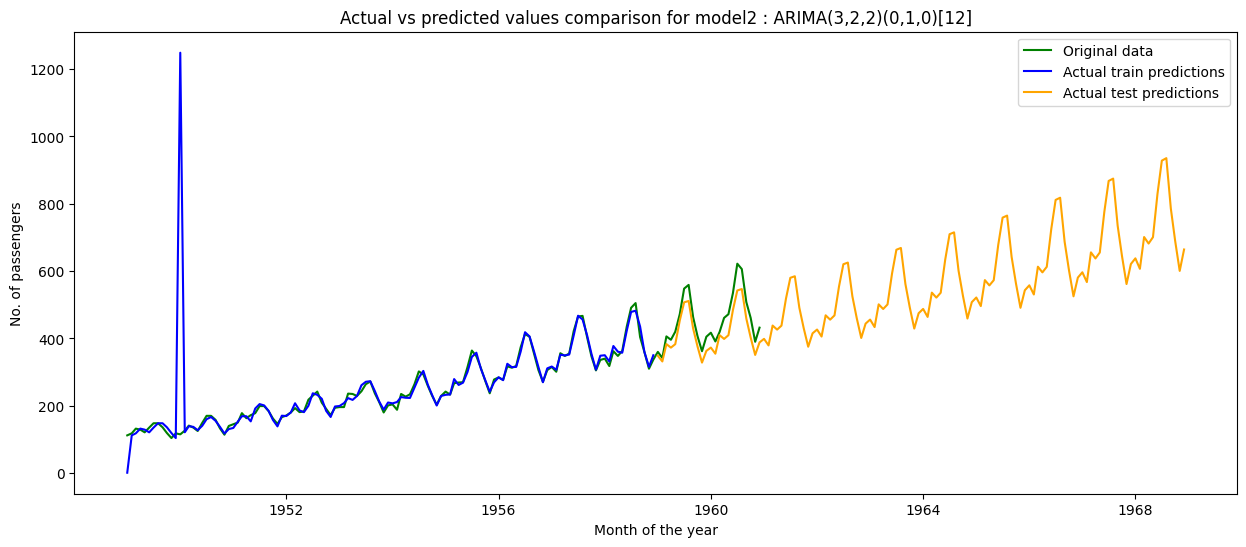

In [57]:
# Plotting actual vs forecasted values
plt.figure(figsize = (15,6))
plt.plot(y, color = 'green', label = 'Original data')
plt.plot(actual_train_predict, color = 'blue', label = 'Actual train predictions')
plt.plot(actual_predictions, color = 'orange', label = 'Actual test predictions')
plt.ylabel('No. of passengers')
plt.xlabel('Month of the year')
plt.title('Actual vs predicted values comparison for model2 : ARIMA(3,2,2)(0,1,0)[12]')
plt.legend(loc = 'best')
plt.show()

Validamos el modelo de Series Temporales analizando los residuales:
1. Los residuos deben ser ruido blanco, es decir, deben ser de naturaleza estacionaria (media constante y variación en el tiempo). Usaremos gráficos ACF y PACF para residuos para probar esto. La caída rápida después de ciertos retrasos en los gráficos ACF y PACF lo confirmará.
2. Los residuos deben seguir una distribución normal. Usaremos histograma y gráfico q-q para confirmar esto.
3. Existe una prueba estadística de Ljung-Box que comprueba si el modelo TS se ajusta bien o no utilizando el estadístico Q.
    - H0: El modelo encaja bien
    - H1: El modelo no encaja bien
    - Rechace H0 si, Q > chi-cuadrado(1-alfa,h) (h = m-p-q, p&q son parámetros del modelo Arima y h es el retraso máximo considerado) o valor p < alfa

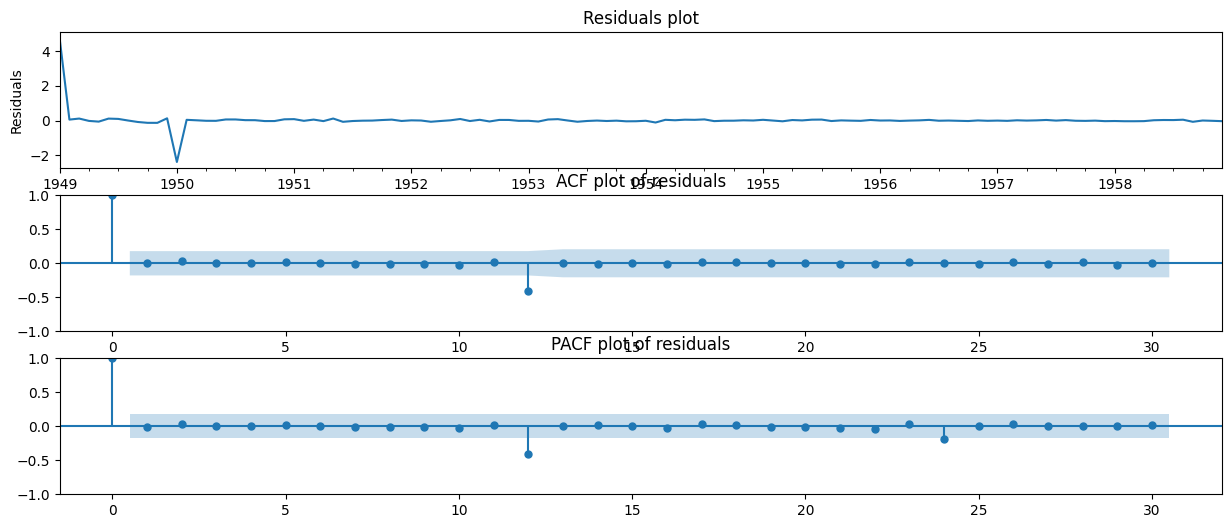

In [58]:
# Validating our best model chosen => model2 => ARIMA(3,2,2)(0,1,0)
residual = results.resid

# 1. Checking white noise of residuals
plt.figure(figsize = (15,6))
plt.subplot(3,1,1)
residual.plot(kind = 'line', xlabel = 'Month', ylabel = 'Residuals', title = 'Residuals plot')
plt.subplot(3,1,2)
plot_acf(residual, ax=plt.gca(), lags = 30, title = 'ACF plot of residuals')
plt.subplot(3,1,3)
plot_pacf(residual, ax=plt.gca(), lags = 30, title = 'PACF plot of residuals')
plt.show()

De los gráficos ACF y PACF, podemos observar que casi todos los retrasos son 0, lo que indica ruido blanco.

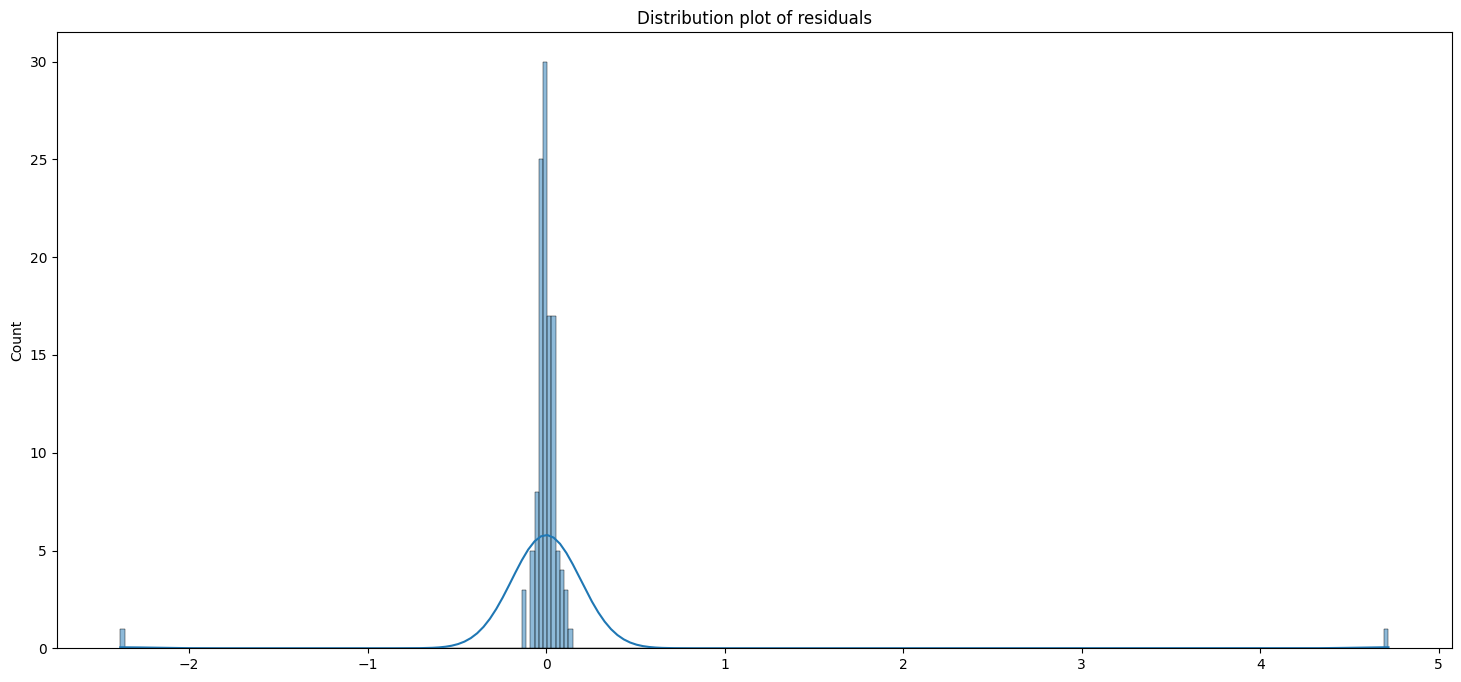

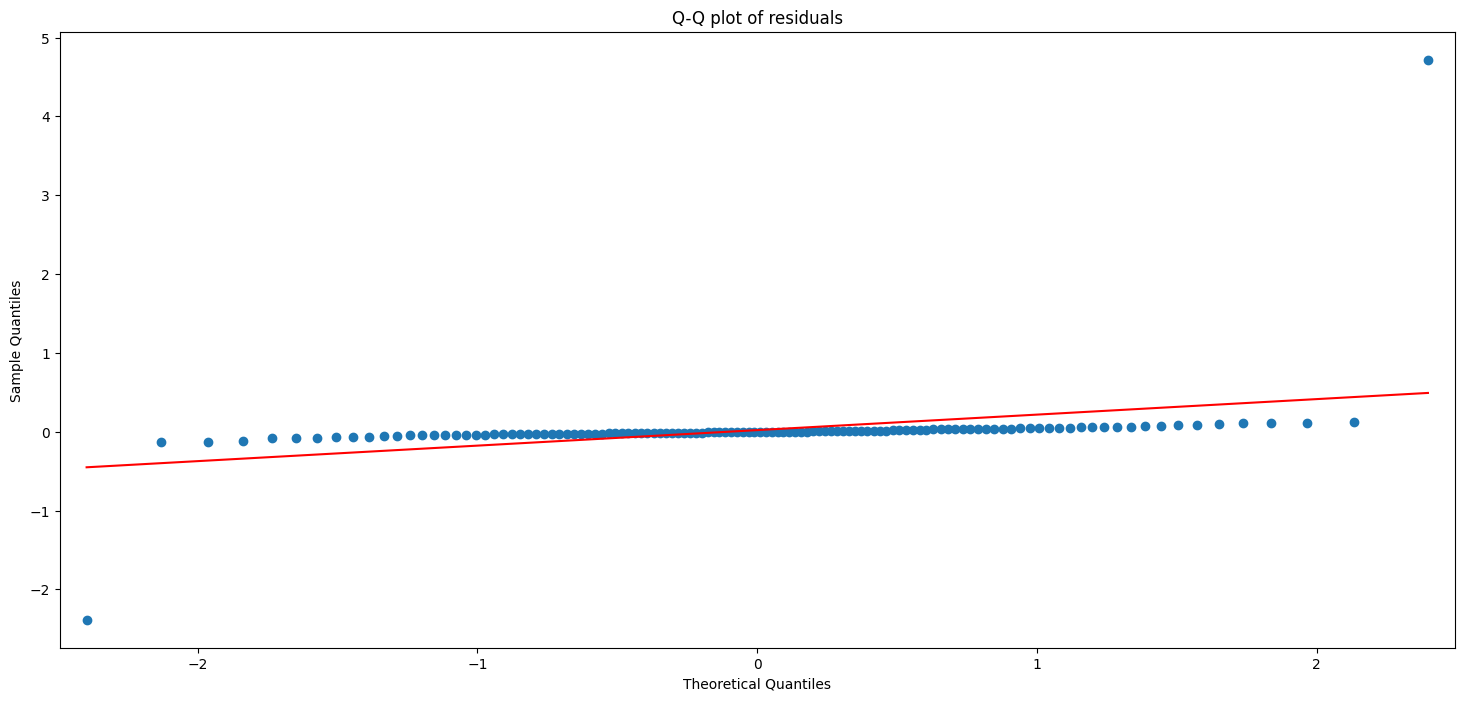

In [59]:

# 2. Checking normality of residuals using distribution plot and q-q plot
plt.figure()
sns.histplot(residual, kde = True)
plt.title('Distribution plot of residuals')
sm.qqplot(residual, line = 'r')
plt.title('Q-Q plot of residuals')
plt.show()

De los gráficos anteriores, podemos observar que los residuos siguen una distribución normal.

In [60]:
# 3. Ljung-Box residual test on our best model => model2 => ARIMA(3,2,2)(0,1,0)[12]
# For determining max. lags for L-B test, we will use folling formulae :
# h = min(10,n/5) --- for non-seasonal TS
# h = min(2m,n/5) --- for seasonal TS
# n = length of time series
# m = seasonal period

# In our case, we have seasonal ts 
n = len(train_ts)
m = 12
h = min(2*m,n/5)

sm.stats.acorr_ljungbox(x = residual,lags = [h], return_df = True)

,lb_stat,lb_pvalue
24,22.653364,0.54033


Dado que el valor p > 0,05 aceptamos H0. Por lo tanto, el modelo esta bien ajustado